## Problem Statement
- Predict the Lead Scores using the features in the Dataset 
- Find the Factors which affect the most
- Suggest them to help in Lead Nurturing

In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Reading data
data=pd.read_csv('Leads.csv')

In [122]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Getting basic Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning
- Treatment of NULL Values
- Removing score variables
- Outliers Removal


In [5]:
# Checking Column wise Null Values
(data.isnull().sum()/len(data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [123]:
# Treatment of "select" categories in variables
for i in data:
    if 'Select' in list(data[i]):
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [124]:
def func(x):
    if x=='Select':
        return np.nan
    else:
        return x

In [125]:
# Treating 'Select' fields
data['Specialization']=data['Specialization'].apply(func)
data['How did you hear about X Education']=data['How did you hear about X Education'].apply(func)
data['City']=data['City'].apply(func)
data['Lead Profile']=data['Lead Profile'].apply(func)


In [9]:
# Again Checking the Null values
(data.isnull().sum()/len(data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [126]:
# Drop variables with high null and score variables
high_null_and_score=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','City','How did you hear about X Education','Tags','Lead Profile']
data.drop(high_null_and_score,axis=1,inplace=True)

In [127]:
# Looking what all Null variables to treat
(data.isnull().sum()/len(data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### Visualising Categorical Variables to see Category Count
- Most of them have one category
- many variables have high percentage of one category

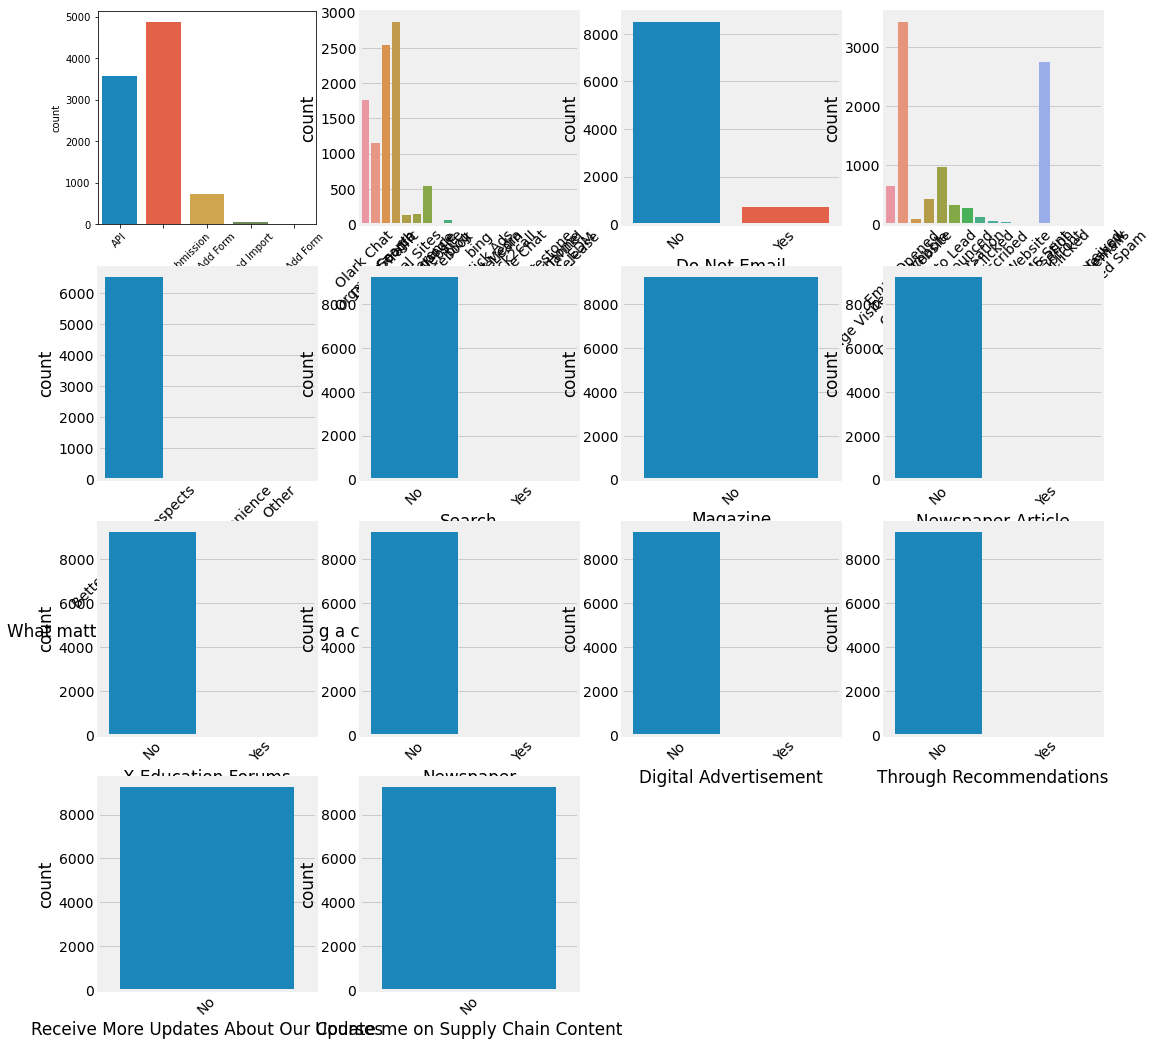

In [12]:
## Visualizing the category count of the variables
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Lead Origin',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,2)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Lead Source',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,3)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Do Not Email',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,4)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Last Activity',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,5)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='What matters most to you in choosing a course',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,6)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Search',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,7)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Magazine',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,8)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Newspaper Article',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,9)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='X Education Forums',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,10)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Newspaper',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,11)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Digital Advertisement',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,12)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Through Recommendations',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)
plt.subplot(4,4,13)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Receive More Updates About Our Courses',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(4,4,14)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Update me on Supply Chain Content',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.show()

In [128]:
## Dropping the skwed columns 
var=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','What matters most to you in choosing a course','Do Not Email','Do Not Call']
data.drop(var,axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          5860 non-null   obje

In [129]:
# Checking the count percentage in Country Coloumn
data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
Germany                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Sweden                  0.000443
Bangladesh              0.000295
Netherlands             0.000295
Belgium                 0.000295
Ghana                   0.000295
Philippines             0.000295
Uganda                  0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Italy                   0.000295
Malaysia                0.000148
Denmark                 0.000148
Switzerlan

In [130]:
#drop country also because of skwed
data.drop('Country',axis=1,inplace=True)

### Missing Values Imputation  and Removing Outliers

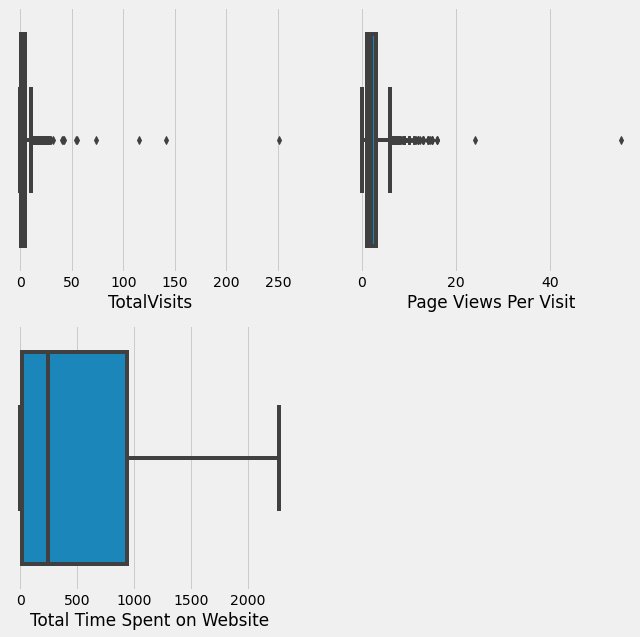

In [131]:
# Checking for Outliers
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['TotalVisits'])
plt.subplot(2,2,2)
sns.boxplot(data['Page Views Per Visit'])
plt.subplot(2,2,3)
sns.boxplot(data['Total Time Spent on Website'])

In [132]:

# Treating Outliers
Q3=data['TotalVisits'].quantile(0.95)
data=data[data['TotalVisits']<=Q3]
Q3=data['Page Views Per Visit'].quantile(0.95)
data=data[data['Page Views Per Visit']<=Q3]
data.shape

(8474, 13)

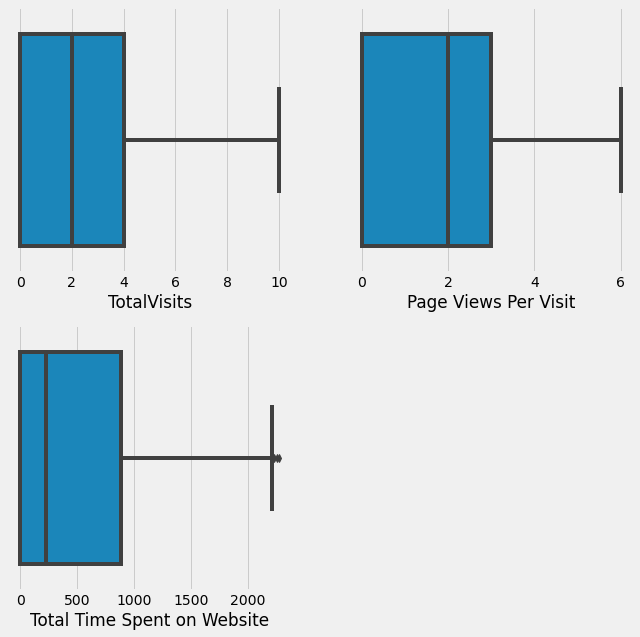

In [133]:
# Outliers are Treated
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['TotalVisits'])
plt.subplot(2,2,2)
sns.boxplot(data['Page Views Per Visit'])
plt.subplot(2,2,3)
sns.boxplot(data['Total Time Spent on Website'])

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8474 non-null   object 
 1   Lead Number                             8474 non-null   int64  
 2   Lead Origin                             8474 non-null   object 
 3   Lead Source                             8445 non-null   object 
 4   Converted                               8474 non-null   int64  
 5   TotalVisits                             8474 non-null   float64
 6   Total Time Spent on Website             8474 non-null   int64  
 7   Page Views Per Visit                    8474 non-null   float64
 8   Last Activity                           8474 non-null   object 
 9   Specialization                          5266 non-null   object 
 10  What is your current occupation         5938 non-null   obje

In [135]:
# Imputing Lead Source
data['Lead Source'].fillna(data['Lead Source'].mode()[0],inplace=True)

In [136]:
# These columns have high null to impute so we replace them with missing
data['Specialization'].fillna('Missing',inplace=True)
data['What is your current occupation'].fillna('Missing',inplace=True)

## Exploratory Data Analysis

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8474 non-null   object 
 1   Lead Number                             8474 non-null   int64  
 2   Lead Origin                             8474 non-null   object 
 3   Lead Source                             8474 non-null   object 
 4   Converted                               8474 non-null   int64  
 5   TotalVisits                             8474 non-null   float64
 6   Total Time Spent on Website             8474 non-null   int64  
 7   Page Views Per Visit                    8474 non-null   float64
 8   Last Activity                           8474 non-null   object 
 9   Specialization                          8474 non-null   object 
 10  What is your current occupation         8474 non-null   obje

## Lead Origin

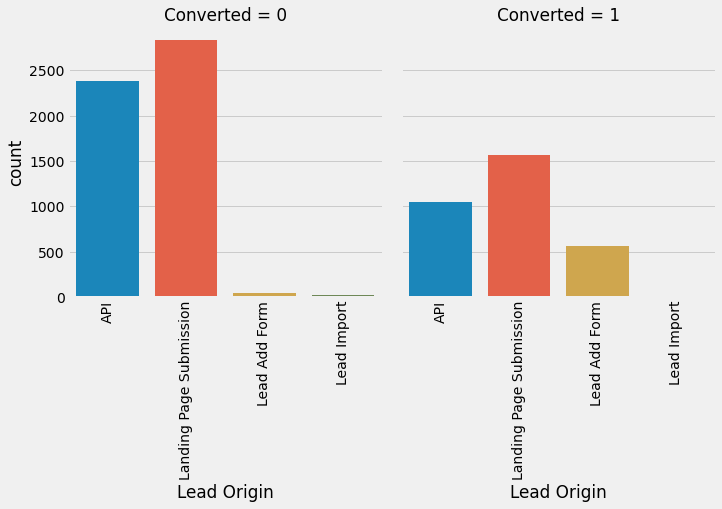

In [138]:
ak=sns.catplot(x='Lead Origin',col='Converted',kind='count',data=data)
ak.set_xticklabels(rotation=90)
# Landing Page Submission have highest Count of Converted Leads

## Lead Source

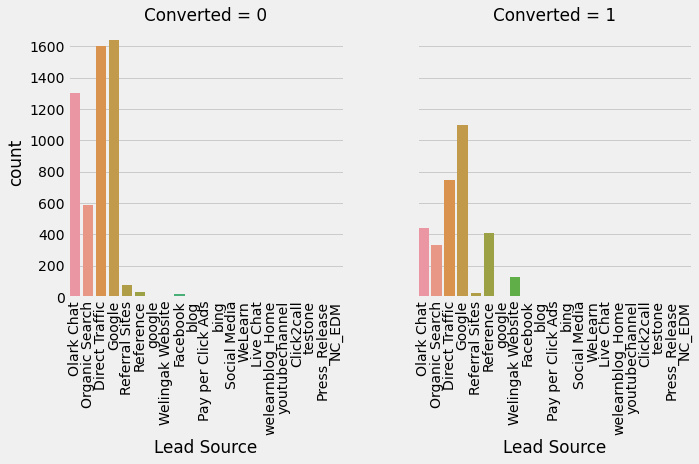

In [25]:
ak=sns.catplot(x='Lead Source',col='Converted',kind='count',data=data)
ak.set_xticklabels(rotation=90)
# Google tops the Category of Lead Source when leads are converted

## Current Occupation

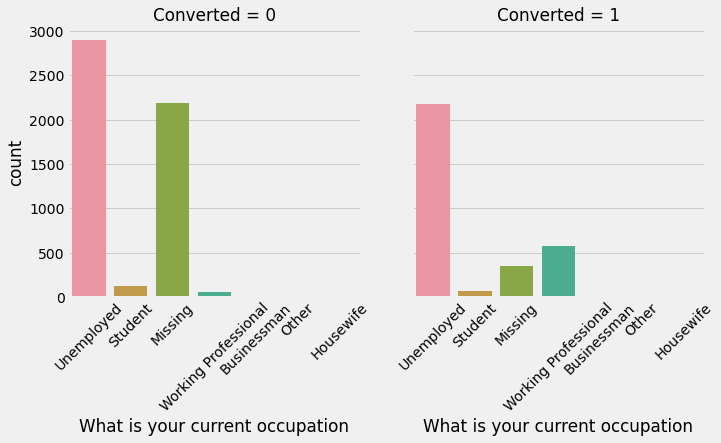

In [26]:
ak=sns.catplot(x='What is your current occupation',col='Converted',kind='count',data=data)
ak.set_xticklabels(rotation=45)
#Umemployed has a very high count of Lead Conversion 

## Last Notable Activity

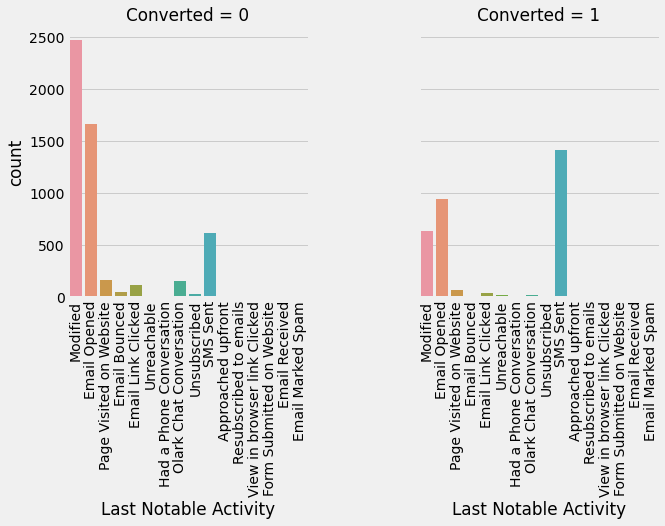

In [27]:
ak=sns.catplot(x='Last Notable Activity',col='Converted',kind='count',data=data)
ak.set_xticklabels(rotation=90)
# SMS Sent was the Last_Notable_Activity for majority of Converted Leads

## Specialization

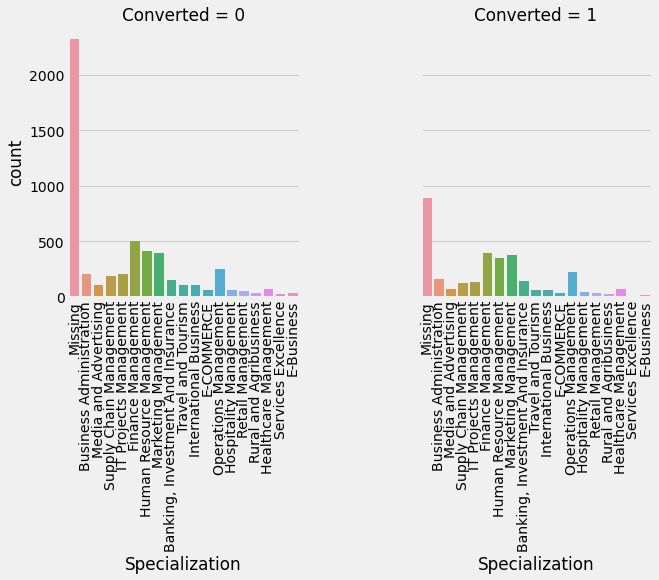

In [28]:
ak=sns.catplot(x='Specialization',col='Converted',kind='count',data=data)
ak.set_xticklabels(rotation=90)

## Total Time Spent on Website

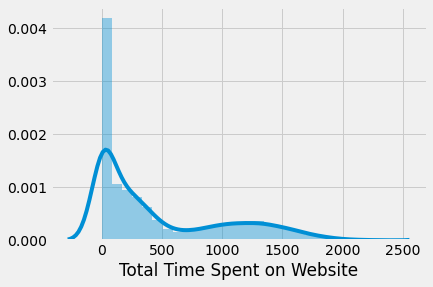

In [29]:
sns.distplot(data['Total Time Spent on Website'])

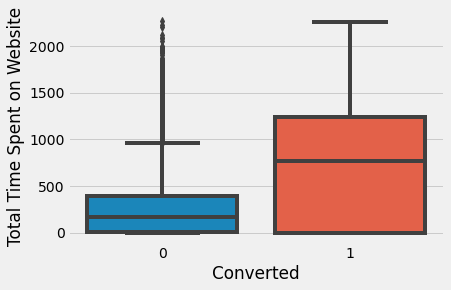

In [30]:
sns.boxplot(x='Converted',y='Total Time Spent on Website',data=data)
# Converted Leads have very high median value for total time spent on website

## Total Visits

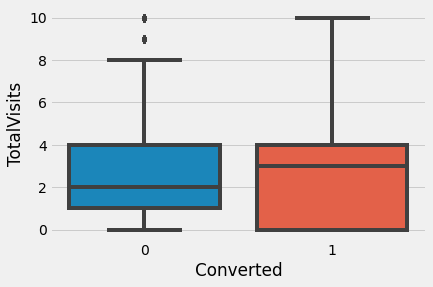

In [31]:
sns.boxplot(x='Converted',y='TotalVisits',data=data)
# Higher Median count for Converted Leads is observed for Total visits

## Data Preparation
- Reducing the number of Categories
- Creationg Dummies for Categorical Columns

In [32]:
# Reducing categories for Lead Source
def func(x):
    if (x!='Google') & (x!='Direct Traffic') & (x!='Olark Chat') & (x!='Organic Search'):
        return 'Others'
    else:
        return x
data['Lead Source']=data['Lead Source'].apply(func)

In [33]:
# Reducing categories for Last Activity
def func(x):
    if (x!='Email Opened') & (x!='SMS Sent') & (x!='Olark Chat Conversation'):
        return 'Others'
    else:
        return x
data['Last Activity']=data['Last Activity'].apply(func)


In [34]:
def func(x):
    if (x!='Missing') & (x!='Finance Management') & (x!='Marketing Management') & (x!='Human Resource Management') & (x!='Operations Management'):
        return 'Others'
    else:
        return x
data['Specialization']=data['Specialization'].apply(func)

In [35]:
def func(x):
    if (x!='Landing Page Submission') & (x!='API'):
        return 'Lead Add and Import'
    else:
        return x
data['Lead Origin']=data['Lead Origin'].apply(func)

In [36]:

def func(x):
    if (x!='Unemployed') & (x!='Working Professional') & (x!='Student'):
        return 'Others'
    else:
        return x
data['What is your current occupation']=data['What is your current occupation'].apply(func)

In [37]:
def func(x):
    if (x!='Modified') & (x!='Email Opened') & (x!='SMS Sent'):
        return 'Others'
    else:
        return x
data['Last Notable Activity']=data['Last Notable Activity'].apply(func)

### Plotting the categorical Count plot

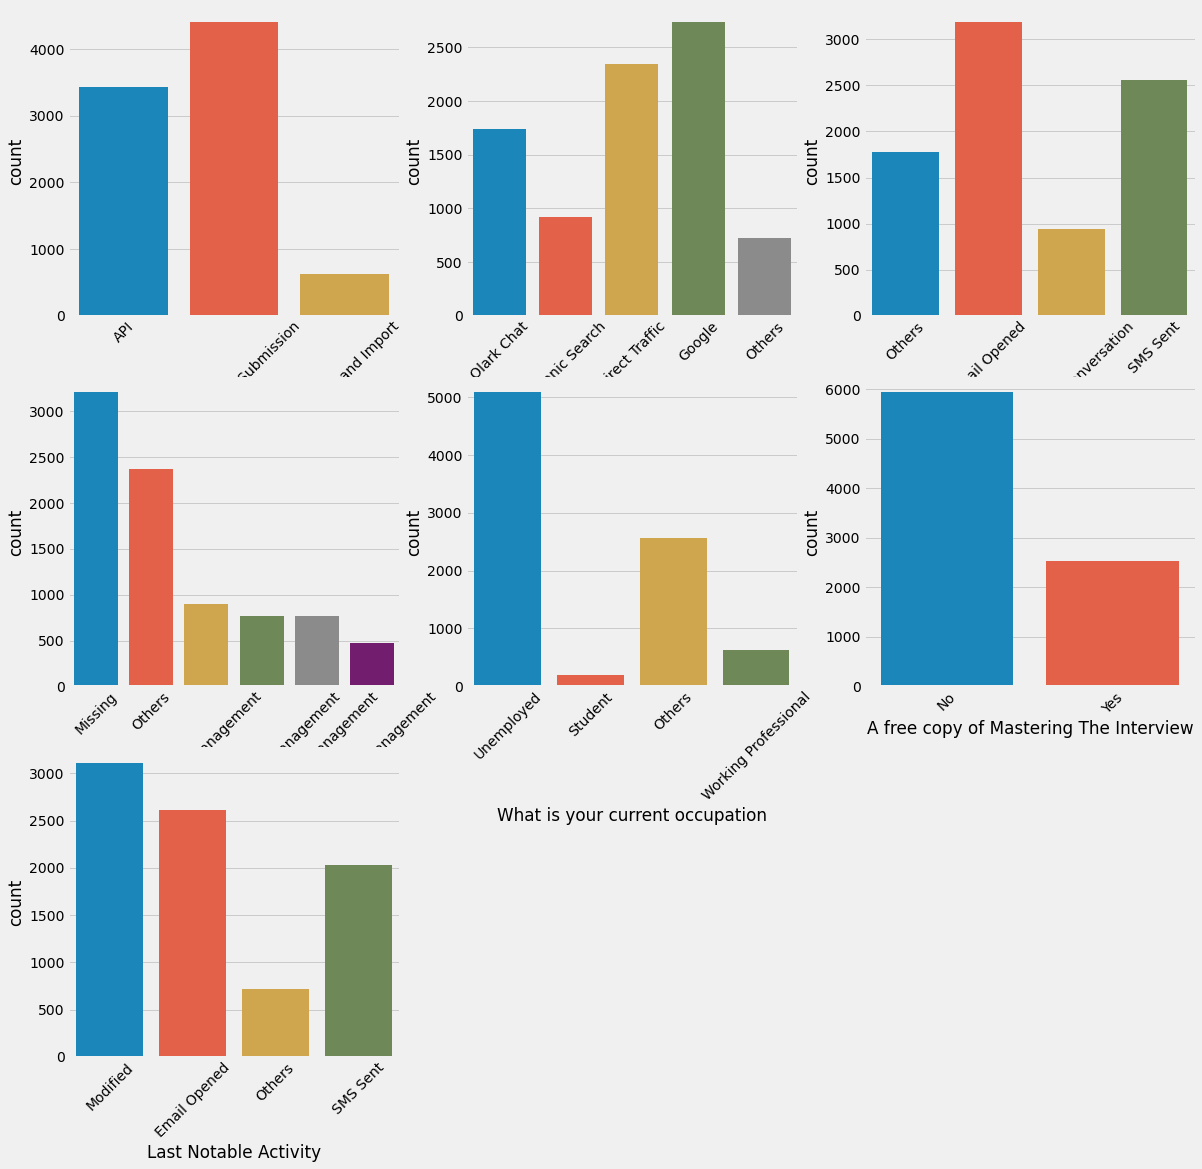

In [38]:

plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Lead Origin',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,2)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Lead Source',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,3)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Last Activity',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,4)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Specialization',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,5)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='What is your current occupation',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,6)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='A free copy of Mastering The Interview',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)

plt.subplot(3,3,7)
plt.style.use('fivethirtyeight')
ak=sns.countplot(x='Last Notable Activity',data=data)
ak.set_xticklabels(ak.get_xticklabels(),rotation=45)
plt.show()

### Creating Dummies for Categorical Variables

In [39]:
## Creating dummies
data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [40]:
data['A free copy of Mastering The Interview'].value_counts()

0    5939
1    2535
Name: A free copy of Mastering The Interview, dtype: int64

In [41]:
ml = pd.get_dummies(data['Lead Origin'], prefix='Lead Origin')
ml = ml.drop(['Lead Origin_Lead Add and Import'], 1)
data= pd.concat([data,ml], axis=1)

ml = pd.get_dummies(data['Lead Source'], prefix='Lead Source')
ml = ml.drop(['Lead Source_Others'], 1)
data= pd.concat([data,ml], axis=1)

ml = pd.get_dummies(data['Specialization'], prefix='Specialization')
ml = ml.drop(['Specialization_Missing'], 1)
data= pd.concat([data,ml], axis=1)

ml = pd.get_dummies(data['What is your current occupation'], prefix='Current_Occupation')
ml = ml.drop(['Current_Occupation_Others'], 1)
data= pd.concat([data,ml], axis=1)

ml = pd.get_dummies(data['Last Notable Activity'], prefix='Last Notable Activity')
ml = ml.drop(['Last Notable Activity_Others'], 1)
data= pd.concat([data,ml], axis=1)

ml = pd.get_dummies(data['Last Activity'], prefix='Last Activity')
ml = ml.drop(['Last Activity_Others'], 1)
data= pd.concat([data,ml], axis=1)

In [42]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Others,Missing,...,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Missing,...,0,0,1,0,1,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,...,1,1,0,0,1,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,...,1,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Missing,...,0,0,1,0,0,1,0,0,0,0


In [43]:
data.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation','Last Notable Activity','Last Activity'],axis=1,inplace=True)

### Test Train Split

In [44]:
## Modelling
X = data.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [45]:
y=data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=69)

## Scaling 

In [48]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

<ipython-input-48-037165c36c7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
4491,-1.180226,-0.858784,-1.257039,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1557,0.536809,1.449979,-0.044249,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2780,-1.180226,-0.858784,-1.257039,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2562,1.824585,1.657675,-0.195848,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1594,0.107550,1.717017,0.562146,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Checking For Correlated Dummy Columns and Treating them

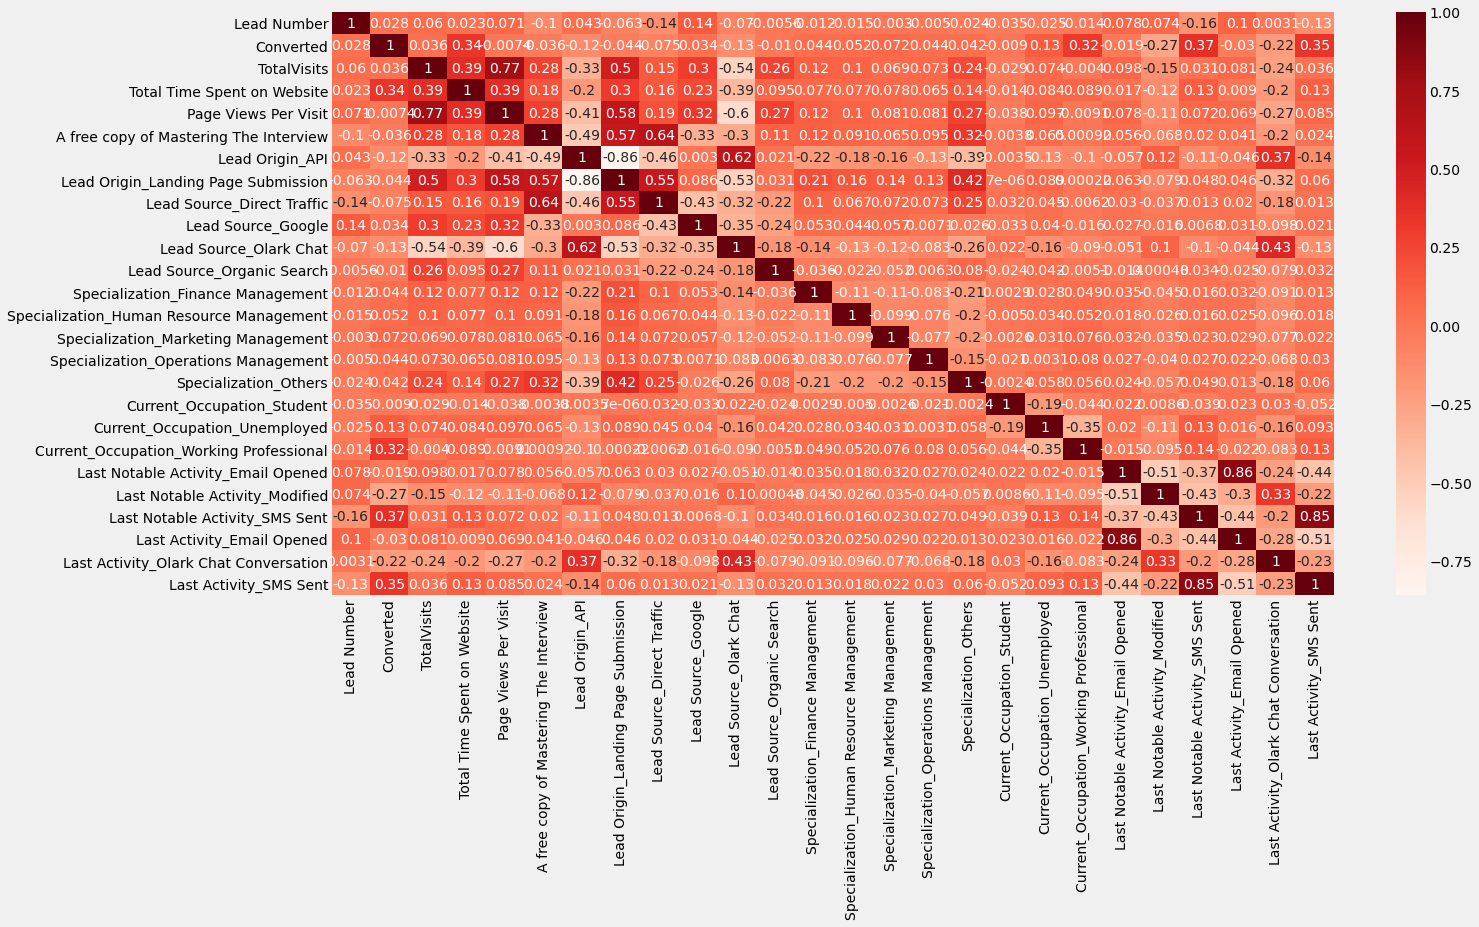

In [49]:
plt.figure(figsize = (20,10))  
sns.heatmap(data.corr(),annot = True,cmap='Reds')
plt.show()
# last_notable_activity email opened has high corelation with last_activity Email opened
#last_notable_activity sms sent  has high corelation with last_activity Sms sent
# so we will choose only one variable from Last activity & Last notable Activity


In [50]:
## Keeping Last Notable Activity and droping Last Activity

X_test = X_test.drop(['Last Activity_Email Opened','Last Activity_Olark Chat Conversation','Last Activity_SMS Sent'], 1)
X_train = X_train.drop(['Last Activity_Email Opened','Last Activity_Olark Chat Conversation','Last Activity_SMS Sent'], 1)

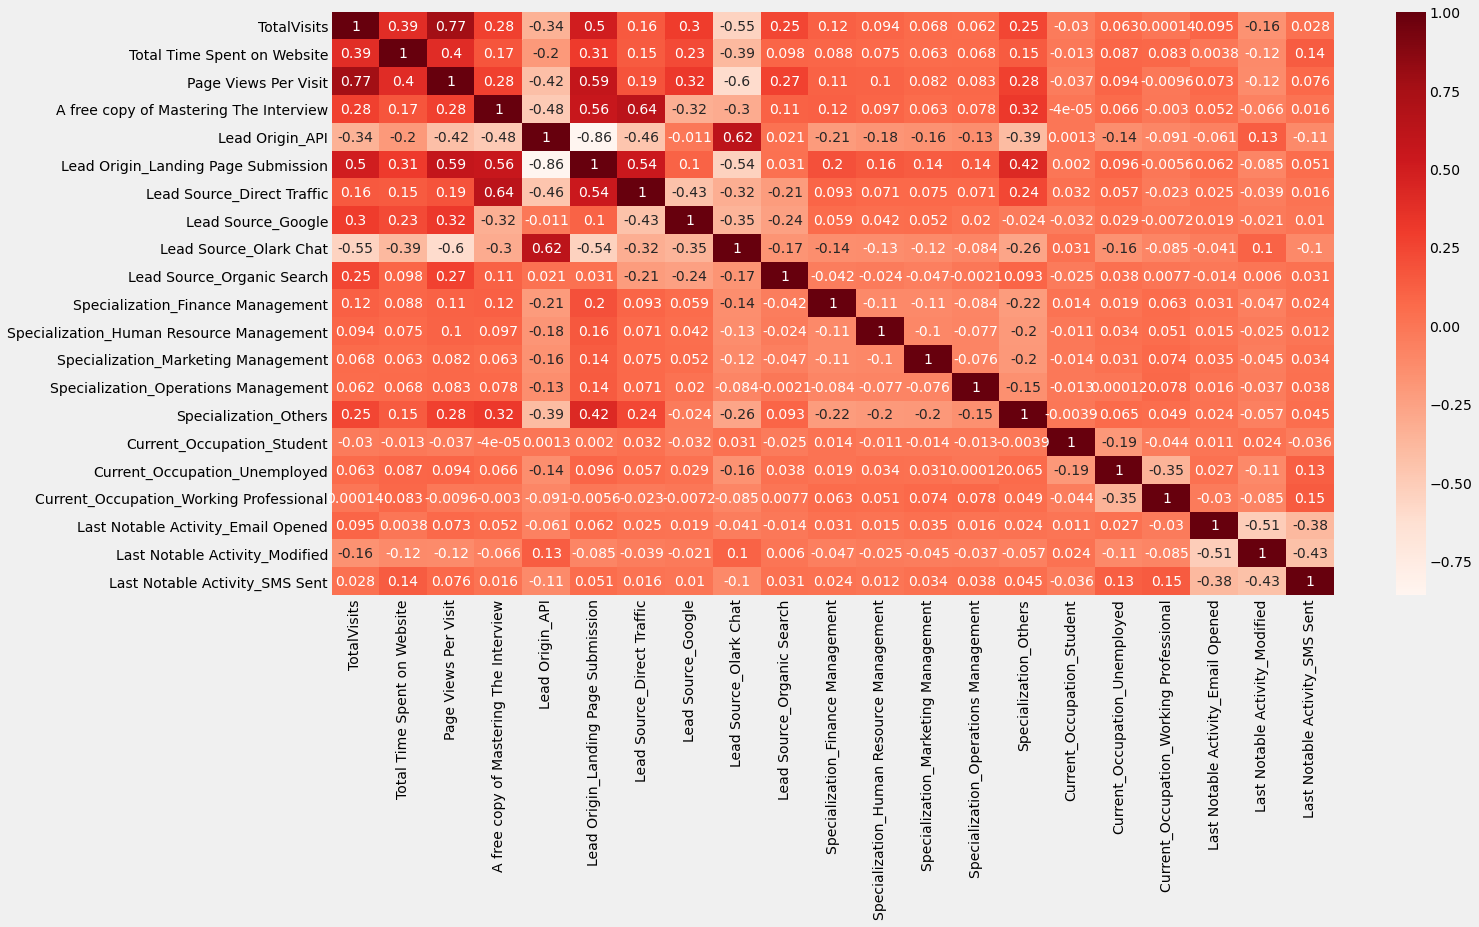

In [51]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True,cmap='Reds')
plt.show()

## Model Building

In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5909
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2432.7
Date:                Mon, 07 Sep 2020   Deviance:                       4865.3
Time:                        19:03:29   Pearson chi2:                 5.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8199      0.245      3.349      0.001       0.340       1.300
TotalVisits                                  0.2478      0.058      4.296      0.000       0.135       0.361
Total Time Spent on Website                  1.0889      0.042     25.695      0.000       1.006       1.172
Page Views Per Visit                        -0.2115      0.065     -3.273      0.001      -0.338      -0.085
A free copy of Mastering The Interview       0.0159      0.116      0.137      0.891      -0.211       0.243
Lead Origin_API                             -3.6740      0.360    -10.205      0.000      -4.380      -2.968
Lead Origin_Landing Page Submission         -4.4273      0.378    -11.718      0.000      -5.168      -3.687
Lead Source_Direct Traffic                  -0.1958      0.323     -0.607      0.544      -0.828       0.437
Lead Source_Google                           0.2270      0.310      0.733      0.464      -0.380       0.834
Lead Source_Olark Chat                       1.2245      0.333      3.681      0.000       0.572       1.877
Lead Source_Organic Search                  -0.0779      0.323     -0.241      0.810      -0.712       0.556
Specialization_Finance Management            0.8267      0.169      4.892      0.000       0.495       1.158
Specialization_Human Resource Management     0.7742      0.171      4.524      0.000       0.439       1.110
Specialization_Marketing Management          0.9954      0.170      5.873      0.000       0.663       1.328
Specialization_Operations Management         0.8193      0.201      4.084      0.000       0.426       1.212
Specialization_Others                        0.8792      0.146      6.033      0.000       0.594       1.165
Current_Occupation_Student                   0.7608      0.243      3.128      0.002       0.284       1.238
Current_Occupation_Unemployed                0.9576      0.090     10.654      0.000       0.781       1.134
Current_Occupation_Working Professional      3.4839      0.214     16.252      0.000       3.064       3.904
Last Notable Activity_Email Opened           0.5474      0.148      3.688      0.000       0.256       0.838
Last Notable Activity_Modified               0.0623      0.151      0.413      0.680      -0.234       0.358
Last Notable Activity_SMS Sent               1.9744      0.154     12.844      0.000       1.673       2.276
============================================================================================================
"""

### RFE

In [53]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [53]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Others', True, 1),
 ('Current_Occupation_Student', True, 1),
 ('Current_Occupation_Unemployed', True, 1),
 ('Current_Occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', False, 6),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### First Model with all variables

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.7
Date:                Mon, 07 Sep 2020   Deviance:                       4891.5
Time:                        19:04:26   Pearson chi2:                 5.88e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8630      0.200      4.315      0.000       0.471       1.255
Total Time Spent on Website                  1.0937      0.042     25.922      0.000       1.011       1.176
Lead Origin_API                             -3.4968      0.200    -17.520      0.000      -3.888      -3.106
Lead Origin_Landing Page Submission         -4.2712      0.210    -20.379      0.000      -4.682      -3.860
Lead Source_Direct Traffic                  -0.3452      0.094     -3.689      0.000      -0.529      -0.162
Lead Source_Olark Chat                       1.0517      0.127      8.304      0.000       0.803       1.300
Specialization_Finance Management            0.8912      0.165      5.390      0.000       0.567       1.215
Specialization_Human Resource Management     0.8161      0.168      4.855      0.000       0.487       1.146
Specialization_Marketing Management          1.0322      0.167      6.173      0.000       0.705       1.360
Specialization_Operations Management         0.8432      0.198      4.248      0.000       0.454       1.232
Specialization_Others                        0.9063      0.142      6.402      0.000       0.629       1.184
Current_Occupation_Student                   0.7491      0.244      3.072      0.002       0.271       1.227
Current_Occupation_Unemployed                0.9415      0.089     10.521      0.000       0.766       1.117
Current_Occupation_Working Professional      3.4556      0.213     16.194      0.000       3.037       3.874
Last Notable Activity_Email Opened           0.5057      0.086      5.914      0.000       0.338       0.673
Last Notable Activity_SMS Sent               1.8909      0.091     20.685      0.000       1.712       2.070
============================================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.22
9,Specialization_Others,4.00
11,Current_Occupation_Unemployed,2.92
1,Lead Origin_API,2.91
4,Lead Source_Olark Chat,2.37
5,Specialization_Finance Management,2.07
3,Lead Source_Direct Traffic,1.97
6,Specialization_Human Resource Management,1.86
7,Specialization_Marketing Management,1.82
13,Last Notable Activity_Email Opened,1.68


In [60]:
col = col.drop(['Lead Origin_Landing Page Submission'], 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Second Model( Removed 'Lead Origin_Landing Page Submission')

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.3
Date:                Mon, 07 Sep 2020   Deviance:                       5508.6
Time:                        19:06:07   Pearson chi2:                 5.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6948      0.130    -13.073      0.000      -1.949      -1.441
Total Time Spent on Website                  0.8390      0.038     22.005      0.000       0.764       0.914
Lead Origin_API                             -0.7506      0.120     -6.262      0.000      -0.986      -0.516
Lead Source_Direct Traffic                  -0.9878      0.086    -11.455      0.000      -1.157      -0.819
Lead Source_Olark Chat                       0.6756      0.118      5.744      0.000       0.445       0.906
Specialization_Finance Management           -0.2976      0.143     -2.087      0.037      -0.577      -0.018
Specialization_Human Resource Management    -0.2655      0.146     -1.817      0.069      -0.552       0.021
Specialization_Marketing Management         -0.0710      0.144     -0.492      0.623      -0.354       0.212
Specialization_Operations Management        -0.4203      0.176     -2.383      0.017      -0.766      -0.075
Specialization_Others                       -0.3376      0.118     -2.868      0.004      -0.568      -0.107
Current_Occupation_Student                   1.0665      0.222      4.809      0.000       0.632       1.501
Current_Occupation_Unemployed                1.2214      0.085     14.395      0.000       1.055       1.388
Current_Occupation_Working Professional      4.0081      0.201     19.915      0.000       3.614       4.403
Last Notable Activity_Email Opened           0.5224      0.079      6.601      0.000       0.367       0.678
Last Notable Activity_SMS Sent               1.8214      0.085     21.431      0.000       1.655       1.988
============================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Current_Occupation_Unemployed,2.89
1,Lead Origin_API,2.66
3,Lead Source_Olark Chat,2.34
8,Specialization_Others,2.15
2,Lead Source_Direct Traffic,1.70
12,Last Notable Activity_Email Opened,1.66
13,Last Notable Activity_SMS Sent,1.62
4,Specialization_Finance Management,1.43
11,Current_Occupation_Working Professional,1.40
6,Specialization_Marketing Management,1.36


In [63]:
col = col.drop('Specialization_Marketing Management', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Third Model( Removed 'Specialization_Marketing Management')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.4
Date:                Mon, 07 Sep 2020   Deviance:                       5508.8
Time:                        19:06:16   Pearson chi2:                 5.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7244      0.115    -15.019      0.000      -1.949      -1.499
Total Time Spent on Website                  0.8362      0.038     22.195      0.000       0.762       0.910
Lead Origin_API                             -0.7261      0.109     -6.661      0.000      -0.940      -0.512
Lead Source_Direct Traffic                  -0.9907      0.086    -11.520      0.000      -1.159      -0.822
Lead Source_Olark Chat                       0.6748      0.118      5.736      0.000       0.444       0.905
Specialization_Finance Management           -0.2657      0.127     -2.093      0.036      -0.515      -0.017
Specialization_Human Resource Management    -0.2337      0.131     -1.784      0.074      -0.491       0.023
Specialization_Operations Management        -0.3884      0.164     -2.368      0.018      -0.710      -0.067
Specialization_Others                       -0.3057      0.098     -3.114      0.002      -0.498      -0.113
Current_Occupation_Student                   1.0668      0.222      4.810      0.000       0.632       1.501
Current_Occupation_Unemployed                1.2193      0.085     14.389      0.000       1.053       1.385
Current_Occupation_Working Professional      3.9969      0.200     19.988      0.000       3.605       4.389
Last Notable Activity_Email Opened           0.5206      0.079      6.585      0.000       0.366       0.675
Last Notable Activity_SMS Sent               1.8218      0.085     21.439      0.000       1.655       1.988
============================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Current_Occupation_Unemployed,2.62
1,Lead Origin_API,2.61
3,Lead Source_Olark Chat,2.34
7,Specialization_Others,1.85
2,Lead Source_Direct Traffic,1.60
11,Last Notable Activity_Email Opened,1.60
12,Last Notable Activity_SMS Sent,1.60
4,Specialization_Finance Management,1.32
10,Current_Occupation_Working Professional,1.31
5,Specialization_Human Resource Management,1.26


In [66]:
col = col.drop(['Specialization_Others','Specialization_Finance Management','Specialization_Human Resource Management','Specialization_Operations Management'],1)
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Final Model( Removed 'All Specialization Dummies')

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5921
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.4
Date:                Mon, 07 Sep 2020   Deviance:                       5520.7
Time:                        19:06:30   Pearson chi2:                 5.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.9286      0.097    -19.872      0.000      -2.119      -1.738
Total Time Spent on Website                 0.8142      0.037     22.060      0.000       0.742       0.887
Lead Origin_API                            -0.5463      0.095     -5.781      0.000      -0.732      -0.361
Lead Source_Direct Traffic                 -1.0101      0.086    -11.809      0.000      -1.178      -0.842
Lead Source_Olark Chat                      0.6549      0.118      5.565      0.000       0.424       0.886
Current_Occupation_Student                  1.0561      0.222      4.747      0.000       0.620       1.492
Current_Occupation_Unemployed               1.2083      0.085     14.295      0.000       1.043       1.374
Current_Occupation_Working Professional     3.9248      0.198     19.780      0.000       3.536       4.314
Last Notable Activity_Email Opened          0.5151      0.079      6.527      0.000       0.360       0.670
Last Notable Activity_SMS Sent              1.8223      0.085     21.482      0.000       1.656       1.989
===========================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_API,2.49
3,Lead Source_Olark Chat,2.33
5,Current_Occupation_Unemployed,2.16
8,Last Notable Activity_SMS Sent,1.56
7,Last Notable Activity_Email Opened,1.51
2,Lead Source_Direct Traffic,1.40
0,Total Time Spent on Website,1.20
6,Current_Occupation_Working Professional,1.18
4,Current_Occupation_Student,1.05


### Prediction on Train set and generating Lead Score

In [69]:
# Predicted Probability on train

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4491    0.332474
1557    0.850212
2780    0.074514
2562    0.911800
1594    0.915610
8992    0.154438
7535    0.280762
3604    0.074514
2048    0.141113
475     0.288114
dtype: float64

In [70]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred*100,'Lead_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index

y_train_pred_final.head()

,Converted,Lead Score,Lead_Prob,ID
4491,0,33.247413,0.332474,4491
1557,1,85.021205,0.850212,1557
2780,0,7.451364,0.074514,2780
2562,1,91.180022,0.911800,2562
1594,1,91.560951,0.915610,1594


In [71]:
y_train_pred_final['predicted'] = y_train_pred_final['Lead_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,Lead_Prob,ID,predicted
4491,0,33.247413,0.332474,4491,0
1557,1,85.021205,0.850212,1557,1
2780,0,7.451364,0.074514,2780,0
2562,1,91.180022,0.911800,2562,1
1594,1,91.560951,0.915610,1594,1


## Metrics and Getting Threshold Values

In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3253  466]
 [ 826 1386]]


In [73]:
# Accuracy for 0.5
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

0.7821615241949081


In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Sestivity for 0.5
TP / float(TP+FN)

0.6265822784810127

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Lead_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead Score,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4491,0,33.247413,0.332474,4491,0,1,1,1,1,0,0,0,0,0,0
1557,1,85.021205,0.850212,1557,1,1,1,1,1,1,1,1,1,1,0
2780,0,7.451364,0.074514,2780,0,1,0,0,0,0,0,0,0,0,0
2562,1,91.180022,0.911800,2562,1,1,1,1,1,1,1,1,1,1,1
1594,1,91.560951,0.915610,1594,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Getting Cutoff Probability
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix



num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.372956  1.000000  0.000000
0.1   0.1  0.548980  0.976944  0.294434
0.2   0.2  0.679481  0.902803  0.546652
0.3   0.3  0.742708  0.796564  0.710675
0.4   0.4  0.773225  0.700271  0.816617
0.5   0.5  0.782162  0.626582  0.874697
0.6   0.6  0.758725  0.510398  0.906426
0.7   0.7  0.741528  0.388788  0.951331
0.8   0.8  0.722981  0.301085  0.973918
0.9   0.9  0.689428  0.180380  0.992202


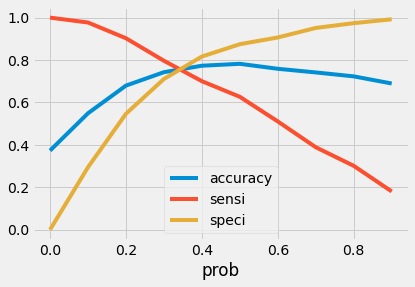

In [76]:
# Getting Cut off
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Cutoff Probability of 0.3 gives best results

In [78]:
#Storing results of 0.3 Probability in new coloumn
y_train_pred_final['final_predicted'] = y_train_pred_final['Lead_Prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Lead Score,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4491,0,33.247413,0.332474,4491,0,1,1,1,1,0,0,0,0,0,0,1
1557,1,85.021205,0.850212,1557,1,1,1,1,1,1,1,1,1,1,0,1
2780,0,7.451364,0.074514,2780,0,1,0,0,0,0,0,0,0,0,0,0
2562,1,91.180022,0.911800,2562,1,1,1,1,1,1,1,1,1,1,1,1
1594,1,91.560951,0.915610,1594,1,1,1,1,1,1,1,1,1,1,1,1


### Train Accuracy

In [79]:

metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.7427078064407351

### Confusion Matrix

In [80]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion2

array([[2643, 1076],
       [ 450, 1762]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Train Senstivity

In [82]:
TP / float(TP+FN)

0.7965641952983725

### Train Specificity

In [83]:
TN / float(TN+FP)

0.7106749126109169

### Predicting Converted when its not been Converted

In [90]:
print(FP/ float(TN+FP))

0.2893250873890831


### Precision

In [91]:
print(TP/(FP+TP))

0.6208597603946441


### Recall

In [92]:
print(TP/(FN+TP))

0.7965641952983725


In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Lead_Prob'])

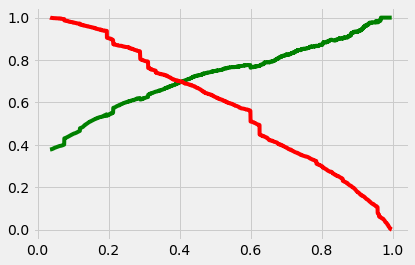

In [95]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## ROC Curve

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Lead_Prob'], drop_intermediate = False )

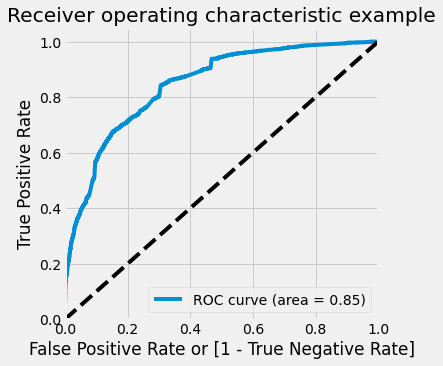

In [98]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Lead_Prob'])

### Working on Test Set

In [99]:
# Scaling
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [100]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Olark Chat,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent
989,-0.133703,1,0,0,0,0,0,1,0
8806,-0.415576,1,0,0,0,1,0,1,0
1368,1.637276,0,1,0,0,0,1,1,0
8195,-0.858784,1,0,1,0,1,0,0,1
2840,-0.810569,0,0,0,0,1,0,0,0


In [102]:
X_test_sm = sm.add_constant(X_test)

### Predictions on Test Set

In [103]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

989     0.112169
8806    0.251617
1368    0.944500
8195    0.625102
2840    0.200949
2149    0.212309
6714    0.646829
7429    0.174371
864     0.310884
5889    0.645164
dtype: float64

In [104]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
989,0.112169
8806,0.251617
1368,0.944500
8195,0.625102
2840,0.200949


In [105]:
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

In [106]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,0,989,0.112169
1,0,8806,0.251617
2,1,1368,0.944500
3,0,8195,0.625102
4,0,2840,0.200949


In [108]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})


In [109]:
y_pred_final.head()

,Converted,ID,Lead_Prob
0,0,989,0.112169
1,0,8806,0.251617
2,1,1368,0.944500
3,0,8195,0.625102
4,0,2840,0.200949


In [110]:
y_pred_final['Lead Score']=y_pred_final['Lead_Prob']*100
y_pred_final.head()

,Converted,ID,Lead_Prob,Lead Score
0,0,989,0.112169,11.216928
1,0,8806,0.251617,25.161651
2,1,1368,0.944500,94.450020
3,0,8195,0.625102,62.510201
4,0,2840,0.200949,20.094906


In [111]:
y_pred_final['final_predicted'] = y_pred_final['Lead_Prob'].map(lambda x: 1 if x > 0.3 else 0)

In [112]:
y_pred_final.head()

,Converted,ID,Lead_Prob,Lead Score,final_predicted
0,0,989,0.112169,11.216928,0
1,0,8806,0.251617,25.161651,0
2,1,1368,0.944500,94.450020,1
3,0,8195,0.625102,62.510201,1
4,0,2840,0.200949,20.094906,0


### Test Accuracy

In [113]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.7569799449469131

### Confusion Matrix

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion2

array([[1133,  431],
       [ 187,  792]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Test Senstivity

In [116]:
TP / float(TP+FN)

0.8089887640449438

## Test Precision

In [117]:
print(TP/(FP+TP))

0.6475878986099755


## Test Specificity

In [118]:
TN / float(TN+FP)

0.7244245524296675

## Test Recall

In [119]:
print(TP/(FN+TP))

0.8089887640449438


## Final Model
- Train Accuracy 74.2%
- Train Senstivity 79.6%
- Test Accuracy 75.6%
- Test Senstivity 80.8%